<a href="https://colab.research.google.com/github/putriwulandariii/Tugas_DL/blob/main/Tugas_DL/Tugas_DL%20/Tugas_DLTM4/running50epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'cars-image-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2050078%2F3411657%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240501%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240501T072917Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D722bdcaa8377f68e4e559f65a3b18d0ae39e0c1350eb105446768631754bf133c63287901904a519e616b1e5d0b046c9466d44e377fbdffc6deebe07bbfdcd4c739bc2599e0bdc1861d3c577a6a62c7e7a0a429f3c835134b9169c7627c21c7ead6e33319cec7970010469d9170da4b3d91ece74232c13ded8eb05305004634413c87247d928125d734aab4044bf4f9f6d06f8e81f61b9f3520ccd0fde01207e4dcf07179c3fb3719c3453b966508d24d249a0c4bc4468e39c24974155e00cd7f6b9eb7a76df0ecaca10680e9ec88166cc456b15f50cbe84f0a81d707f61f4388c50e575fc29c0be6a47beddde5a820800264b8bc21b0348e3a8323a84168485'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 38049454 bytes downloaded
Downloaded and uncompressed: cars-image-dataset
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
        print(os.path.join(dirname))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/cars-image-dataset
/kaggle/input/cars-image-dataset/Cars Dataset
/kaggle/input/cars-image-dataset/Cars Dataset/train
/kaggle/input/cars-image-dataset/Cars Dataset/train/Hyundai Creta
/kaggle/input/cars-image-dataset/Cars Dataset/train/Rolls Royce
/kaggle/input/cars-image-dataset/Cars Dataset/train/Mahindra Scorpio
/kaggle/input/cars-image-dataset/Cars Dataset/train/Toyota Innova
/kaggle/input/cars-image-dataset/Cars Dataset/train/Tata Safari
/kaggle/input/cars-image-dataset/Cars Dataset/train/Audi
/kaggle/input/cars-image-dataset/Cars Dataset/train/Swift
/kaggle/input/cars-image-dataset/Cars Dataset/test
/kaggle/input/cars-image-dataset/Cars Dataset/test/Hyundai Creta
/kaggle/input/cars-image-dataset/Cars Dataset/test/Rolls Royce
/kaggle/input/cars-image-dataset/Cars Dataset/test/Mahindra Scorpio
/kaggle/input/cars-image-dataset/Cars Dataset/test/Toyota Innova
/kaggle/input/cars-image-dataset/Cars Dataset/test/Tata Safari
/kaggle/input/cars-image-dataset/Car

## Hello Guys!

Here we are going to create a Convolution Neural Network(CNN) model on **Car Images Dataset** which is used to predict cars of seven category i.e Audi,Hyundai Creta,Mahindra Scorpio,Rolls Royce,Maruti Suzuki Swift,Tata Safari and Toyota Innova.

## Why CNN?

As we know that image classification involves extraction of features from the image to observe some patterns in the dataset.
The CNN follows a hierarchical model which works on building a network, like a funnel, and finally gives out a fully-connected layer(dense layer) where all the neurons are connected to each other and the output is processed.CNNs are very effective in reducing the number of parameters without losing on the quality of models. Images have high dimensionality (as each pixel is considered as a feature) which suits the above described abilities of CNNs.In CNN dimensionalty reduction is achieved using a sliding window with a size less than that of the input matrix.

## Importing the required libraries

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## Importing data into tensorflow dataset object

### Lets we understand what ImageDataGenerator do...

This will run through image data and apply random transformations to each individual image as it is passed to the model so that it never sees the exact same image twice during training.<br/>
The benefit here is that the model will become more robust as it trains on images that are slightly distorted, and it helps to prevent the model from learning noise in the data such as where features are located in the image.

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/cars-image-dataset/Cars Dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

Found 3352 images belonging to 7 classes.


In [5]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [7]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/kaggle/input/cars-image-dataset/Cars Dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

Found 813 images belonging to 7 classes.


In [8]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.38184288 0.3407873  0.33294415]
  [0.42026508 0.38513526 0.37729213]
  [0.48339483 0.4500181  0.44818756]
  ...
  [0.8078432  0.8000001  0.80392164]
  [0.8078432  0.8000001  0.80392164]
  [0.8078432  0.8000001  0.80392164]]

 [[0.37524462 0.33363914 0.325796  ]
  [0.41586623 0.3796367  0.37179357]
  [0.47019833 0.43737143 0.4338913 ]
  ...
  [0.8078432  0.8000001  0.80392164]
  [0.8078432  0.8000001  0.80392164]
  [0.8078432  0.8000001  0.80392164]]

 [[0.36864635 0.32649103 0.3186479 ]
  [0.4114674  0.37413815 0.366295  ]
  [0.45700178 0.42472473 0.41959506]
  ...
  [0.8078432  0.8009045  0.80211264]
  [0.8078432  0.80145437 0.80101293]
  [0.8078432  0.8020042  0.7999132 ]]

 ...

 [[0.42954203 0.43137258 0.4254468 ]
  [0.42789248 0.43137258 0.42599666]
  [0.4262429  0.43137258 0.4265465 ]
  ...
  [0.90437067 0.7653068  0.60482603]
  [0.912931   0.7756761  0.61881334]
  [0.91176796 0.774513   0.6176503 ]]

 [[0.41789353 0.42573667 0.41805786]
  [0.41624397 0.4240871  0.41530856]


## Creating the CNN model

### How to stack up layers?

There are three types of layers that make up the CNN which are the convolutional layers, pooling layers, and fully-connected layers. When these layers are stacked, a CNN architecture will be formed.<br/>
**Convolution->Relu->Pooling->Convolution->Relu->Pooling->Flattening->Fully Connected layer**

CNN Layer-This layer is the first layer that is used to extract the various features from the input images.

Pooling layer-It is to decrease the size of the convolved feature map to reduce the computational costs. This is performed by decreasing the connections between layers and independently operates on each feature map.

Fully Connected layer-It consists of the weights and biases along with the neurons and is used to connect the neurons between two different layers.

Dropout-To overcome overfitting problem, a dropout layer is utilised wherein a few neurons are dropped from the neural network during training process resulting in reduced size of the model.

Relu Activation Function-It decides which information of the model should be send in the forward direction and which ones should not at the end of the network.

In [9]:
sz = 128

# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
model.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax')) # softmax for more than 2

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 96)                2

## Compiling the model

In [11]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [24]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50
)

Epoch 1/50
105/105 [==============================] - 19s 182ms/step - loss: 0.2536 - accuracy: 0.9030 - val_loss: 1.4256 - val_accuracy: 0.7048
Epoch 2/50
105/105 [==============================] - 20s 189ms/step - loss: 0.2199 - accuracy: 0.9257 - val_loss: 1.3925 - val_accuracy: 0.7232
Epoch 3/50
105/105 [==============================] - 19s 182ms/step - loss: 0.2210 - accuracy: 0.9203 - val_loss: 1.4507 - val_accuracy: 0.7392
Epoch 4/50
105/105 [==============================] - 20s 188ms/step - loss: 0.2119 - accuracy: 0.9233 - val_loss: 1.4619 - val_accuracy: 0.7269
Epoch 5/50
105/105 [==============================] - 26s 245ms/step - loss: 0.2204 - accuracy: 0.9147 - val_loss: 1.4532 - val_accuracy: 0.7405
Epoch 6/50
105/105 [==============================] - 19s 185ms/step - loss: 0.2184 - accuracy: 0.9206 - val_loss: 1.4707 - val_accuracy: 0.7294
Epoch 7/50
105/105 [==============================] - 19s 177ms/step - loss: 0.2196 - accuracy: 0.9162 - val_loss: 1.4137 - val_ac

In [25]:
scores = model.evaluate(test_generator)

26/26 [==============================] - 4s 135ms/step - loss: 1.4585 - accuracy: 0.7417


In [26]:
scores

[1.4585295915603638, 0.7416974306106567]

## Plotting the accuracy and loss curves

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
type(history.history['loss'])

list

In [29]:
len(history.history['loss'])

50

In [31]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.2536309063434601,
 0.2198539525270462,
 0.22104455530643463,
 0.2119389772415161,
 0.22039002180099487]

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

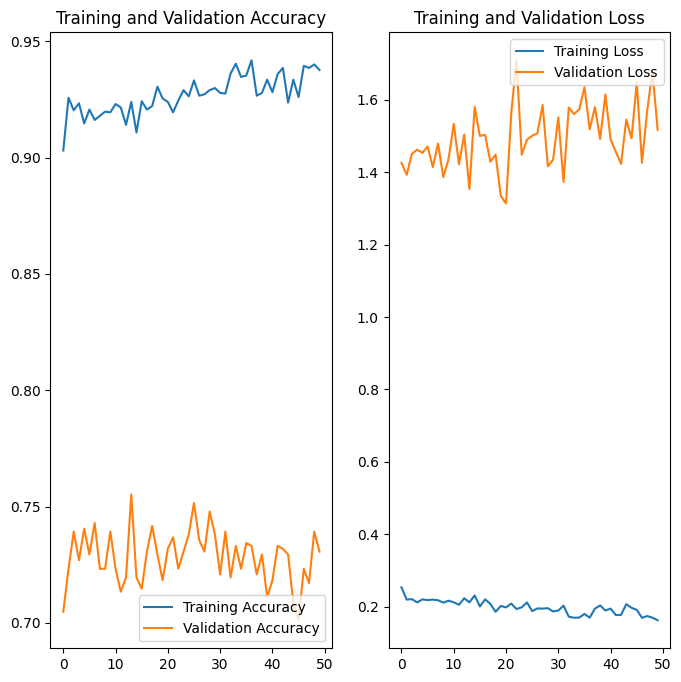

In [33]:
import matplotlib.pyplot as plt
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Testing the prediction on sample of image from test dataset

In [22]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 31ms/step


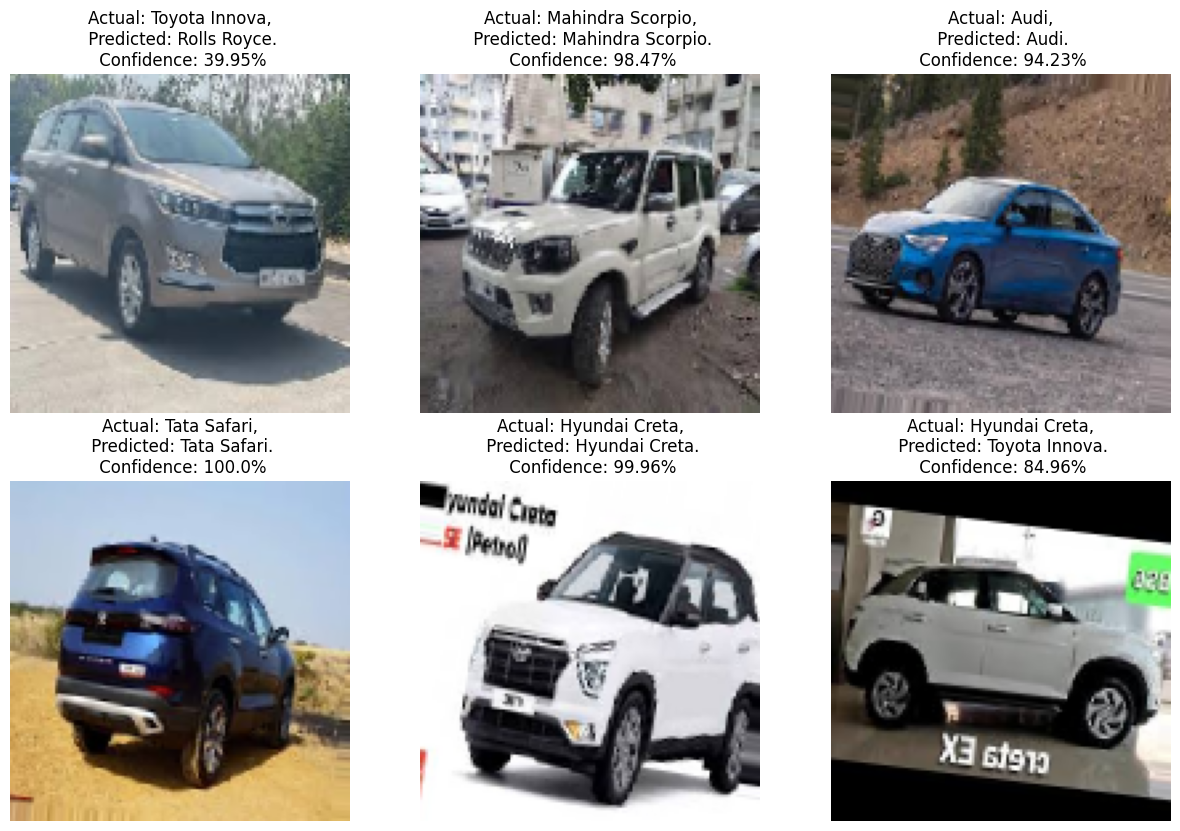

In [23]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

#### Thus, here almost all the images are predicted accurately.

## If you find this notebook useful please upvote it!